# [REFERENCE 1](https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676)
# [REFERENCE 2](https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff)

### Importing libraries

In [62]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

### Load data to dataframe

In [63]:
df = pd.read_csv('dataset/red_wine.csv')

### Preview row and column length

In [64]:
df.shape

(1599, 17)

In [65]:
len(df.columns)

17

In [66]:
len(df.index)

1599

### Preview df head and tail

In [67]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,addone,addtwo,addtiga,timestamp,whitespace
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,YES,Satupill,rest,10000,YESSatupill'
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,YES,Satupill,rest,20000,YESSatupill
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,YES,Satupill,rest,30000,YESSatupill
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,YES,Satupill,x,40000,YESSatupill
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,YES,Satupill,rest,50000,YESSatupill


In [68]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,addone,addtwo,addtiga,timestamp,whitespace
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,YES,Tiga,rest,15950000,YESTiga
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,YES,Dua,rest,15960000,YESDua
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,YES,Tiga,rest,15970000,YESTiga
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,YES,Dua,rest,15980000,YESDua
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,YES,Tiga,x,15990000,YESTiga


### Rename column

In [69]:
df.rename(columns={'fixed acidity' : 'acidity', 'total sulfur dioxide' : 'total SO2',
                  'free sulfur dioxide' : 'free SO2'}, inplace=True)
df.head()

,acidity,volatile acidity,citric acid,residual sugar,chlorides,free SO2,total SO2,density,pH,sulphates,alcohol,quality,addone,addtwo,addtiga,timestamp,whitespace
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,YES,Satupill,rest,10000,YESSatupill'
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,YES,Satupill,rest,20000,YESSatupill
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,YES,Satupill,rest,30000,YESSatupill
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,YES,Satupill,x,40000,YESSatupill
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,YES,Satupill,rest,50000,YESSatupill


### Drop column / row

In [70]:
df.drop(['addone', 'addtwo'], axis=1, inplace=True)
df.head()

,acidity,volatile acidity,citric acid,residual sugar,chlorides,free SO2,total SO2,density,pH,sulphates,alcohol,quality,addtiga,timestamp,whitespace
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,rest,10000,YESSatupill'
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,rest,20000,YESSatupill
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,rest,30000,YESSatupill
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,x,40000,YESSatupill
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,rest,50000,YESSatupill


### Summarize descriptive statistics

In [71]:
df.describe()

,acidity,volatile acidity,citric acid,residual sugar,chlorides,free SO2,total SO2,density,pH,sulphates,alcohol,quality,timestamp
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1.599000e+03
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,8.000000e+06
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,4.617359e+06
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.000000e+04
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,4.005000e+06
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,8.000000e+06
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.199500e+07
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.599000e+07


### Transform numerical value into categorical data

In [72]:
df.loc[df.quality > 0, 'quality class'] = 'Bleugh!' #0-4
df.loc[df.quality > 4, 'quality class'] = 'So-So' #5-6
df.loc[df.quality > 6, 'quality class'] = 'Best!' #7-above

df.tail()

,acidity,volatile acidity,citric acid,residual sugar,chlorides,free SO2,total SO2,density,pH,sulphates,alcohol,quality,addtiga,timestamp,whitespace,quality class
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,rest,15950000,YESTiga,So-So
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,rest,15960000,YESDua,So-So
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,rest,15970000,YESTiga,So-So
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,rest,15980000,YESDua,So-So
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,x,15990000,YESTiga,So-So


### Count each column value (best for categorical data)

In [73]:
df['whitespace'].value_counts().sort_values(ascending=False)

YESSatupill      1184
YESTiga           285
YESDua             54
NOSatupill         41
NOTiga             17
NODua               4
 YESSatupill        3
  YESSatupill       2
 YESTiga            1
 YESSatupill'       1
  YESTiga           1
Name: whitespace, dtype: int64

### Removing unwanted character

In [74]:
df['whitespace'] = df['whitespace'].str.strip(' ')
df['whitespace'] = df['whitespace'].str.strip("'")
df['whitespace'] = df['whitespace'].str.strip('pill')

df['whitespace'].value_counts().sort_values(ascending=False)

YESSatu    1190
YESTiga     287
YESDua       54
NOSatu       41
NOTiga       17
NODua         4
Name: whitespace, dtype: int64

### Dataframe info

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 16 columns):
acidity             1599 non-null float64
volatile acidity    1599 non-null float64
citric acid         1599 non-null float64
residual sugar      1599 non-null float64
chlorides           1599 non-null float64
free SO2            1599 non-null float64
total SO2           1599 non-null float64
density             1599 non-null float64
pH                  1599 non-null float64
sulphates           1599 non-null float64
alcohol             1599 non-null float64
quality             1599 non-null int64
addtiga             1599 non-null object
timestamp           1599 non-null int64
whitespace          1593 non-null object
quality class       1599 non-null object
dtypes: float64(11), int64(2), object(3)
memory usage: 200.0+ KB


### Check data type

In [76]:
df.dtypes

acidity             float64
volatile acidity    float64
citric acid         float64
residual sugar      float64
chlorides           float64
free SO2            float64
total SO2           float64
density             float64
pH                  float64
sulphates           float64
alcohol             float64
quality               int64
addtiga              object
timestamp             int64
whitespace           object
quality class        object
dtype: object

### Change data type

In [77]:
df['quality'] = df['quality'].astype('float64')
df['quality'].dtypes

dtype('float64')

### Check for missing data

In [78]:
df.isnull().sum().sort_values(ascending=False)

whitespace          6
quality class       0
timestamp           0
addtiga             0
quality             0
alcohol             0
sulphates           0
pH                  0
density             0
total SO2           0
free SO2            0
chlorides           0
residual sugar      0
citric acid         0
volatile acidity    0
acidity             0
dtype: int64

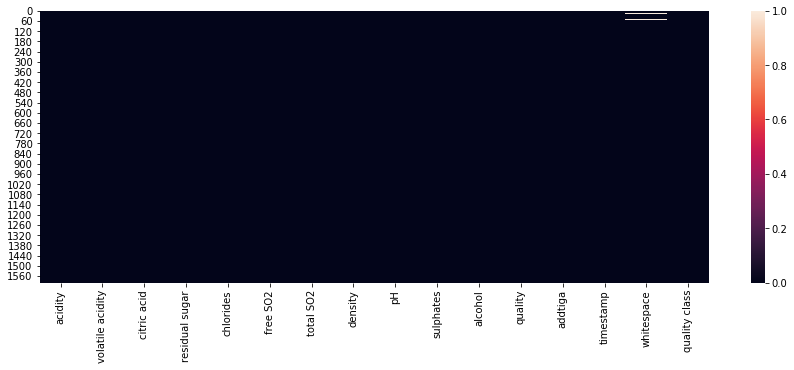

In [79]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull())
plt.show()

### Encode categorical data to number

In [80]:
num_encode = {'whitespace' : {'YESSatu':1.1, 'YESTiga':1.2, 'YESDua':1.3, 'NOSatu':2.1, 'NOTiga':2.2, 'NODua':2.3}}  
df.replace(num_encode, inplace=True)

df['whitespace'].value_counts().sort_values(ascending=False)

1.1    1190
1.2     287
1.3      54
2.1      41
2.2      17
2.3       4
Name: whitespace, dtype: int64

### Replacing NaN with column mean

In [86]:
mean = int(df['whitespace'].mean(skipna = True))
df['whitespace'] = df['whitespace'].replace(np.NaN, mean)

df['whitespace'].value_counts().sort_values(ascending=False)

1.1    1190
1.2     287
1.3      54
2.1      41
2.2      17
1.0       6
2.3       4
Name: whitespace, dtype: int64

### Preview many histogram at once

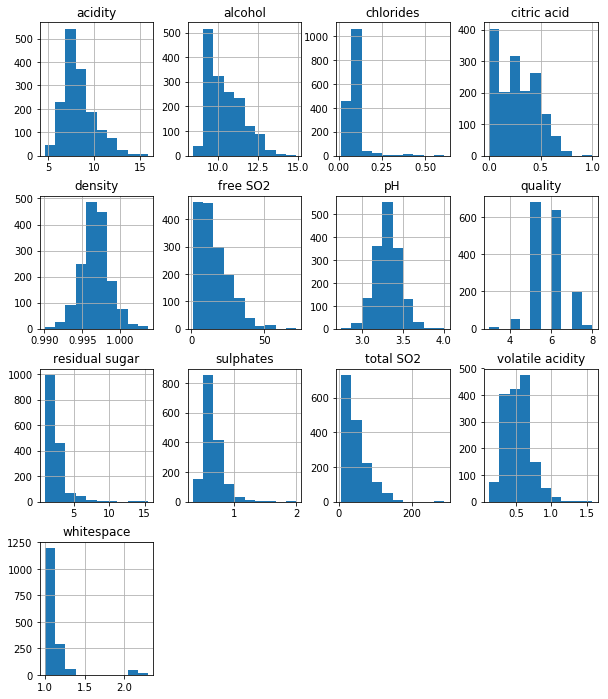

In [87]:
histo = df.select_dtypes(include=['float64'])
img = histo.hist(figsize=(10,12))

### Correlation Matrix

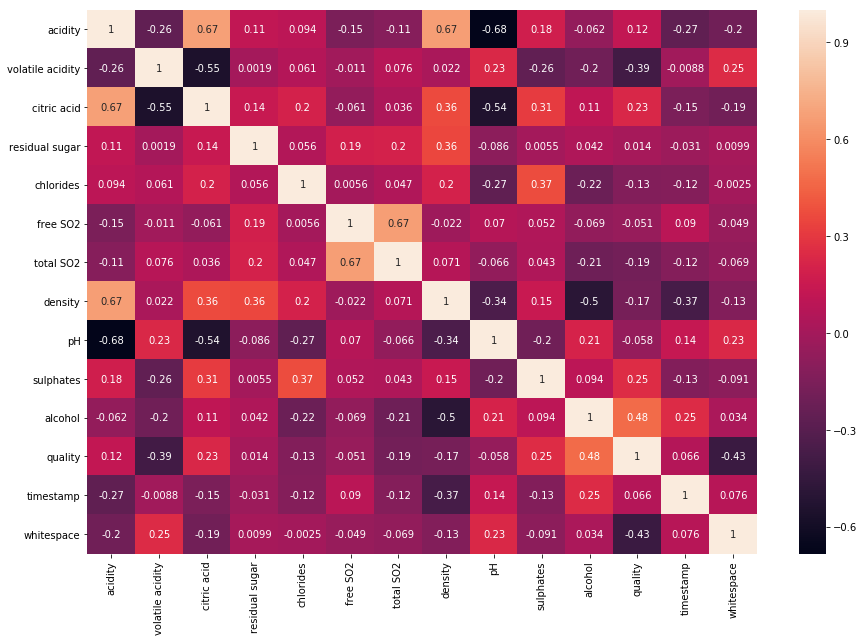

In [88]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## BOXPLOT

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.boxplot(x='sex',y='charges',data=df)
# ax.set(xlabel='Quality', ylabel='Alcohol')
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(df['bmi'],df['charges'])
# plt.xlabel('pH')
# plt.ylabel('Citric Acid')
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
hist_data = 'charges'
count,bin_edges = np.histogram(df[hist_data])
df[hist_data].plot(kind='hist',xticks=bin_edges)
# plt.xlabel('Alcohol Content')
# plt.ylabel('')
plt.grid()
plt.show()

In [ ]:
df_temp = df[['region','sex','charges']]
df_group = df_temp.groupby(['sex','region'],as_index=False).mean()
df_group

In [ ]:
df_pivot = df_group.pivot(index='region',columns='sex')
df_pivot

In [ ]:
dsc.missing_data(df)

In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
sns.barplot(x="region", y="charges", data=df)

In [ ]:
plt.bar(df['region'], df['charges'])

## ANOVA (Analysis of Variace)

In [ ]:
temp_df = df[['region','charges']].groupby(['region'])
stats.f_oneway(temp_df.get_group('southwest')['charges'],temp_df.get_group('northwest')['charges'])

In [ ]:
temp_df = df[['region','charges']].groupby(['region'])
stats.f_oneway(temp_df.get_group('southwest')['charges'],temp_df.get_group('southeast')['charges'])

## Correlation Matrix

In [ ]:
# col = 'region'
# num_encode = {col : {'southwest':0, 'northwest':1, 'northeast':2, 'southeast':3}}  
# df.replace(num_encode, inplace=True)
# df.head()

col = 'smoker'
num_encode = {col : {'yes':0, 'no':1}}  
df.replace(num_encode, inplace=True)
df.head()

In [ ]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
sns.regplot(x='age',y='charges',data=df)

In [ ]:
sns.regplot(x='bmi',y='charges',data=df)

In [ ]:
sns.regplot(x='smoker',y='charges',data=df)

In [ ]:
sns.regplot(x='age',y='bmi',data=df)